# Exercise 3: Data manipulation and statistical analysis.
- Grouping data to apply functions
- Considering how we handle different data types differently
- Time series data
- OLS regression
- Generalised linear models (for count outcomes)



## Bike share data
For most of this exercise we will be using bike share data from Transport for London, downloaded from [Kaggle](https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset). I have downloaded the data and saved it as a csv file for you in the notebook directory. You can also download the dataset yourselves.

#### Note about Kaggle <a class="tocSkip">
Kaggle is a great source of datasets which are free to download to get started with doing some data analysis. They also run data challenges where a dataset and problem will be given for you to solve. These challenges are a great way to practice your data science skills.

#### About the data <a class="tocSkip">
    
Bike sharing is where bicycles are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. [Source](https://en.wikipedia.org/wiki/Bicycle-sharing_system)
    
If you are unfamiliar with the concept of bike sharing in the UK have a quick read of this [article](https://tfl.gov.uk/modes/cycling/santander-cycles/how-it-works) <br>

Some metadata information about the variables:
- <b>cnt</b>: The count of new bike shares
- <b>timestamp</b>: date and time of new bike share
- <b>t1</b>: real temperature in Celsius
- <b>t2</b>: "feels like" temperature in Celsius 
- <b>hum</b>: humidity in percentage
- <b>wind_speed</b>: wind speed in km/h
- <b>weather_code</b>: category of the weather
    - Description:
        - 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
        - 2 = scattered clouds / few clouds
        - 3 = Broken clouds
        - 4 = Cloudy
        - 7 = Rain/ light Rain shower/ Light rain
        - 10 = rain with thunderstorm
- <b>is_holiday</b>: boolean field: 1 holiday / 0 non holiday
- <b>is_weekend</b>: boolean field: 1 if the day is weekend/ 0 weekday
- <b>season</b>: category field of meteorological seasons: 0: spring ; 1: summer; 2: autumn; 3:winter
    
<br> <font color='orchid'> <b>Run the code below to read in the data </b></font>



In [1]:
# Import the pandas package
import pandas as pd
import seaborn as sns

In [5]:
# read in data from a csv file to a pandas dataframe
# if you have downloaded the file yourself and saved it elsewhere remember to change the ("file directory")

bike = pd.read_csv("london_merged.csv")

#### Explore the data <a class="tocSkip">
Explore the data yourselves using the <code>.head()</code>, <code>.tail()</code> and <code>.describe()</code> functions introduced in exercise 1.
<br> <font color='blue'> <b>Write your own code below </b></font>

In [ ]:
# explore the data


In [ ]:
# explore the data


Let us also check the data type of each of the columns in the bike dataframe using <code>.dtypes</code> to see if they are what we expect.
<br> <font color='blue'> <b>Run the code below </b></font>

In [ ]:
bike.dtypes

#### Metadata and data type comaprison  <a class='tocSkip'>

We would expect temperature (t1,t2), percentage humidity (hum) and wind speed (wind_speed) to be floats as these values are not limited to whole whole numbers. <br>

We would also expect cnt to be an integer as you cannot get half a bike share. <br>

Though is_holiday and is_weekend are boolean (1 or 0 aka True or False) we will leave them as integers for now to make later analysis easier.<br>

We can see that the timestamp column has been read in as object. While it should be a datetime data type. We can convert the object to datetime using the pandas function <code>pd.to_datatime</code>

<br> <font color='blue'> <b>Run the code below </b></font>

In [6]:
bike['timestamp'] = pd.to_datetime(bike['timestamp'])

In [7]:
# re-run d.types to check timestamp is now datetime
bike.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

### Visualising the bike share data.

To get a better sense of how the variables are all related we can plot a pair plot as we did in section 3.6
<br> <font color='blue'> <b>Run the code below* </b></font> 

*this might take a minute or two

In [ ]:
sns.pairplot(bike);

#### What can we tell from the pairplots above? <a class="tocSkip">

Try and answer the following questions looking at the plot above:
- Is the week or weekend more popular for bike shares?
- Is there a relationship between weather and season?
- Do holidays affect bike share use?
- Which variables are most highly correlated? Is this surprising?
- Is there a trend between number of bike shares and percentage humidity?
- Which of the numerical variables are normally distributed and which are skewed<br>
<br>
- What do you think will be the best predictors of bike share count?

##### Write any notes/ answers here in this markdown (text) cell.
-  
- 
- 
- 
- 
- 


## Introduction to the  groupby function
### What is the<code>.groupby()</code> function?
An explanation from the [package documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):<br>
<i>"A groupby operation involves some combination of splitting the object, applying a function, and combining the results. This can be used to group large amounts of data and compute operations on these groups"</i>

<code>.groupby()</code> is useful to group data to identify interesting patterns and calculate some summary statistics that give us more insight into the data. <code>.groupby()</code> can also be used to group data before we plot it, to make more interesting graphs and visualisations.

We can group the bike dataframe by <code>'is_weekend'</code>, then use the <code>.size()</code> function to calculate how many days are classified as being a weekend or weekday.
<br> <font color='blue'> <b>Run the code below </b></font>

In [8]:
# group the bike dataframe by 'is_weekend', then use the .size() function
bike.groupby('is_weekend').size()

is_weekend
0    12444
1     4970
dtype: int64

We can also group the data and then calculate summary statistics (using the functions introduced last workshop: <code>.mean()</code>, <code>.median()</code>, <code>.quantile(0.25)</code>, <code>.max()</code>, <code>.min()</code>)

<br> <font color='orchid'> <b>Run the code below then experiment calculating your own summary statistics on grouped data</b></font>

In [ ]:
bike.groupby('is_weekend').mean()

In [ ]:
# experiment here


In [ ]:
# experiment here


In [ ]:
# experiment here


If you are interested in calculating the summary stats. of one column you can put it in squared brackets after the groupby function <br> I.e. <code><font color='red'>dataframe_name</font>.groupby("<font color='red'>column_name to groupby</font>")["<font color='red'>column_name to calc. summary stats for</font>"].mean()</code>

In [ ]:
# group the bike dataframe by 'is_weekend' and calcualte the mean number of bike shares ('cnt') for weekdays and weekends
bike.groupby('is_weekend')['cnt'].mean()

<font color='blue'><b> Write your own function to group the bike dataframe by 'is_weekend' and calculate the <b>maximum</b> daily number of bike shares ('cnt') on a weekday and weekend </font> (Solution at the end of the exercise if you get stuck)

In [ ]:
bike.groupby('is_weekend')['cnt'].max()

<font blue='orchid'> <b>Write your own function to calculate the mean number of bike shares for each season </b> </font> (Solution at the end of the exercise if you get stuck)

In [ ]:
bike.groupby('season')['cnt'].mean()

<font blue='orchid'> <b>Write your own function to calculate the minimum number of daily bike shares for each weather type </b></font> (Solution at the end of the exercise if you get stuck)

In [ ]:
bike.groupby('weather_code')['cnt'].min()

## Plotting time series data

Let us plot the total number of bike share uses per day. Currently the bike share data is provided for every hour of every day so we need to group these together to calculate the totals for the day. First of all we need to create a new column for just the date. <br>
We do this using the datetime.date function: <code>.dt.date</code>
<br> <font color='blue'> <b>Run the code below </b></font>

In [11]:
bike['date']= bike['timestamp'].dt.date

In [12]:
# let's check it has worked
bike.head()

timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0 2015-04-01 00:00:00  182  3.0  2.0   93.0         6.0             3   
1 2015-04-01 01:00:00  138  3.0  2.5   93.0         5.0             1   
2 2015-04-01 02:00:00  134  2.5  2.5   96.5         0.0             1   
3 2015-04-01 03:00:00   72  2.0  2.0  100.0         0.0             1   
4 2015-04-01 04:00:00   47  2.0  0.0   93.0         6.5             1   

   is_holiday  is_weekend  season        date  
0           0           1       3  2015-04-01  
1           0           1       3  2015-04-01  
2           0           1       3  2015-04-01  
3           0           1       3  2015-04-01  
4           0           1       3  2015-04-01

Next we need to use the <code>.groupby()</code> function to get a dataframe where each row is a unqiue day.<br>

To do this we need to think carefully about how we want to aggregate the columns of the dataframe:<br>

For <b>count</b> it makes sense to take the total number of bike share uses across all hours to get the total for the day: therefore we want to aggregate using the <code>.sum()</code> function.<br>

For the <b>temperature, humidity and wind speed</b> variables it does not make sense to take the sum of all hours (we would end up with very high temeperatures, humidities and wind speeds) instead taking the average value of all hours of the day makes more sense, using the <code>.mean()</code> function. <br>

As <b>weather_code</b> is a non-continuous categorical variable, where a number is used to represent the weather conditions, taking the most common hourly weather type during a day is the most sensible way to accurately represent the overall weather for that day. We can do this using the <code>pd.Series.mode</code> function.

For the <b> holiday, weekend, season</b> and <b>date</b> variables they will be the same across all hours of the day, so no calculation is needed. Instead we will just take the first value (for ease) using the <code>.first()</code> function.
<br> <font color='blue'> <b>Run the code below to test this out </b></font>

In [13]:
# let's test this out
bike.groupby('date')['cnt'].sum()

date
2015-01-02    11305
2015-01-03    15641
2015-01-04    23539
2015-01-05    29579
2015-01-06    27864
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-02-01    11823
2017-03-01    19436
Name: cnt, Length: 730, dtype: int64

In [14]:
# let's test this out
# we can add .head() to show just the first 5 lines
bike.groupby('date')['t1','t2','hum','wind_speed'].mean().head()

/var/folders/1k/ssxgt9nj43s59lwqxvcj1lgh0000gn/T/ipykernel_62738/769432296.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bike.groupby('date')['t1','t2','hum','wind_speed'].mean().head()


t1         t2        hum  wind_speed
date                                                   
2015-01-02   3.791667  -0.895833  67.000000   24.770833
2015-01-03   9.187500   6.416667  66.687500   29.583333
2015-01-04   8.500000   4.937500  59.854167   31.708333
2015-01-05   9.083333   7.229167  64.250000   18.875000
2015-01-06  12.104167  11.437500  62.833333   23.645833

In [15]:
# let's test this out
bike.groupby('date')['weather_code'].apply(pd.Series.mode).head()

date         
2015-01-02  0    3
2015-01-03  0    2
2015-01-04  0    2
2015-01-05  0    2
2015-01-06  0    2
Name: weather_code, dtype: int64

In [16]:
# let's test this out
bike.groupby('date')['is_holiday','is_weekend','season','date'].first().head()

/var/folders/1k/ssxgt9nj43s59lwqxvcj1lgh0000gn/T/ipykernel_62738/4263433707.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bike.groupby('date')['is_holiday','is_weekend','season','date'].first().head()


is_holiday  is_weekend  season        date
date                                                  
2015-01-02           0           1       3  2015-01-02
2015-01-03           0           1       0  2015-01-03
2015-01-04           0           0       0  2015-01-04
2015-01-05           0           0       0  2015-01-05
2015-01-06           0           0       1  2015-01-06

We can do this all separately, but what if we want to produce a dataframe of the aggregated by day bike data?
It is not just as easy as directly combining the above code.
<font color='blue'> Uncomment (remove #) and run the code below, note the error message </font>

In [ ]:
#bike.groupby('date')['t1','t2','hum','wind_speed'].mean()['is_holiday','is_weekend','season','date'].first()

To solve this we can use <code>.agg({})</code> function to apply ["one or more operations over the specified axis"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).
<br> For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method.

<font color='blue'> Run the code below and check you understand what it is doing </font>

In [17]:
bike_day = bike.groupby('date').agg({'cnt':'sum', 't1':'mean','t2':'mean','hum':'mean',
                                     'wind_speed':'mean','weather_code':pd.Series.mode,
                                     'is_holiday':'first','is_weekend':'first',
                                     'season':'first','date':'first'})
bike_day.head()

cnt         t1         t2        hum  wind_speed weather_code  \
date                                                                          
2015-01-02  11305   3.791667  -0.895833  67.000000   24.770833            3   
2015-01-03  15641   9.187500   6.416667  66.687500   29.583333            2   
2015-01-04  23539   8.500000   4.937500  59.854167   31.708333            2   
2015-01-05  29579   9.083333   7.229167  64.250000   18.875000            2   
2015-01-06  27864  12.104167  11.437500  62.833333   23.645833            2   

            is_holiday  is_weekend  season        date  
date                                                    
2015-01-02           0           1       3  2015-01-02  
2015-01-03           0           1       0  2015-01-03  
2015-01-04           0           0       0  2015-01-04  
2015-01-05           0           0       0  2015-01-05  
2015-01-06           0           0       1  2015-01-06

We can now plot number of bike shares by day of the week 

In [ ]:
# change figure size
plt.figure(figsize=(15,6))


sns.lineplot(x="date", y="cnt", data=bike_day, marker='.')

## What influences bike share use?

Temperature seems a likely candidate to influence bike share usage, particularly in the UK- few people enjoy cycling in the freezing cold. But may hot temperatures also put people off cycling? <br>

Let's plot a <code>lmplot()</code> to fit a regression model to the actual temperature and count columns. <br>
<font color='blue'> Run the code below </font>

In [ ]:
sns.lmplot(x="t1", y="cnt", data=bike_day, markers='.');

There is a pretty strong positive association between increased temperature and number of bike share uses. And warmer temperatures do not seem to be putting people off.

Does whether it is the weekend or not moderate how temperature is associated with the number of bike share uses? <br>
Let's fit another <code>lmplot()</code> this time specifying <code>hue</code> as 'is_weekend'. <br>
<font color='blue'> Run the code below </font>

In [ ]:
g = sns.lmplot(x="t1", y="cnt", hue="is_weekend", data=bike_day, markers='.');

Look at how the season moderates the correlation between temperature and number of bike share uses.<br>
<font color='blue'> Run the code below </font>

In [ ]:
g = sns.lmplot(x="t1", y="cnt", hue="season", col="season", data=bike_day, markers='.');

<font color='blue'> <b>Create other lmplots to explore how well the variables predict count of bike share uses </font> <br> 

In [ ]:
# lmplot()


In [ ]:
# lmplot()


In [ ]:
# lmplot()


## Linear Regression

As previously mentioned the stats. theory around regression will not be covered in great detail. We will just introduce you to running regression analysis in python and some useful other tools and visualisations to help you.

### Correlation
Before conducting a regression analysis it is important to understand which explanatory variables (X) may be correlated. We can explore this using the <code>.corr()</code> function. <br>
Results will be between -1 (absolute negative correlation to +1 (absoulte positive correlation)
<br> <font color='orchid'> <b>Run the code below </b></font>

In [ ]:
bike.corr()

This is a useful set of information, but quite difficult to quickly compare values across columns and rows. We can plot a <code>sns.heatmap()</code> which colours each cell depending on the level of correlation between the column and row variables.]<br> <font color='orchid'> <b>Run the code below </b></font>

In [ ]:
# set figure size
plt.figure(figsize=(8,8))
# plot a heatmap of the correlation table created above, annot= True annotates the cells with the correlation value
sns.heatmap(bike.corr(), annot=True);

In [ ]:
# import required regression packages
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

### Simple Linear Regression

To make it simple we are going to first show you how to predict continuous data, so we will be prediciting temperature
<br> <font color='orchid'> <b>Run the code below </b></font>

In [ ]:
# plot a qqplot to see if t1 is normally distributed (package imported above)


't1' looks fairly normally distibuted so we will go ahead and build a simple linear regresssion model

In [ ]:
bike_day['t1'].hist()

### Fitting an OLS model
<br> <font color='orchid'> <b>Run the code below, using the comments to aid your understanding </b></font>

In [ ]:
# predict temperature given the known number of bike shares

# define X and y
X = bike["cnt"] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

### Model evaluation
To interpret these results, we need to look at the following results:<br>

<b>R$^{2}$</b> - this tells us the percentage of the dependent variable explained by the model. R-square is always between 0% and 100%, 100% suggesting that the model explains all the variability in the data. Here, r-square is 0.595, indicating that the model explains 59.5% of the variability, and therefore suggesting that the model fits the data fairly well. <br>

<b>P value </b>- the p-value tells us whether the relationship could have happened by chance. Small values (<0.05) mean that these results are significant, and probably did not occur by chance, showing us that there is a relationship between these variables. This is the case here, as the reuslts show us that the P value is 0.000. <br>

<b>AIC</b> - if you have several models, the AIC can be used to assess how good one model is compared to the others, and can therefore be used to identify the best model. As a general rule, a decrease of more than 3 suggests a model improvement.<br>

<b>Coefficient</b> - coefficients represent the mean change in the dependent variable (i.e. temperature) for one unit of change in the explanatory variable (i.e. bike count). So, here, every additional bike used, corresponds to a temperature increases of 0.0067 degrees. 

<b>Confidence Intervals</b> - [0.025,0.975] represents the range in which our coefficients are likely to fall (with a likelihood of 95%- i.e. we expect 95% of the time the values will fall between these two values). If the confidence interval spans 0 this suggests poor model fit. As this suggests the model predicts both a positive and negative association between the independent and dependent variables. 

Have a look at R$^{2}$, AIC, the coefficent, [0.025,0.975] and P>|t| (p value) to evaluate model fit

### Visual Model evaluation

#### Plot OLS regression plot

In [19]:
# predict temperature given the known number of bike shares

# define X and y
X = bike["cnt"] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



NameError: name 'sm' is not defined

### Model evaluation
To interpret these results, we need to look at the following results:<br>

<b>R$^{2}$</b> - this tells us the percentage of the dependent variable explained by the model. R-square is always between 0% and 100%, 100% suggesting that the model explains all the variability in the data. Here, r-square is 0.595, indicating that the model explains 59.5% of the variability, and therefore suggesting that the model fits the data fairly well. <br>

<b>P value </b>- the p-value tells us whether the relationship could have happened by chance. Small values (<0.05) mean that these results are significant, and probably did not occur by chance, showing us that there is a relationship between these variables. This is the case here, as the reuslts show us that the P value is 0.000. <br>

<b>AIC</b> - if you have several models, the AIC can be used to assess how good one model is compared to the others, and can therefore be used to identify the best model. As a general rule, a decrease of more than 3 suggests a model improvement.<br>

<b>Coefficient</b> - coefficients represent the mean change in the dependent variable (i.e. temperature) for one unit of change in the explanatory variable (i.e. bike count). So, here, every additional bike used, corresponds to a temperature increases of 0.0067 degrees. 

<b>Confidence Intervals</b> - [0.025,0.975] represents the range in which our coefficients are likely to fall (with a likelihood of 95%- i.e. we expect 95% of the time the values will fall between these two values). If the confidence interval spans 0 this suggests poor model fit. As this suggests the model predicts both a positive and negative association between the independent and dependent variables. 

Have a look at R$^{2}$, AIC, the coefficent, [0.025,0.975] and P>|t| (p value) to evaluate model fit

### Visual Model evaluation

#### Plot OLS regression plot

In [ ]:
# define r squared
# model.rsquared: return the R^2 value
# round( ,2): rounds R^2 to 2 decimal places
r2 = round(model.rsquared,2)

# define figure size
fig, ax = plt.subplots(figsize=(10,10))

# plot regression plot 
sns.regplot('cnt','t1', data=bike);

# add text lable
# 6700, 35: text postion based on x and y axsis
# "R squared=" +str(r2) : label equated to text "R squared=" and defined rsqaured as a string
# specify fontsize
ax.text(6700, 34, "R squared=" +str(r2), fontsize=12)
ax.set_xlabel('Bike share count')
ax.set_ylabel('Temperature');

#### Plot actual versus predicted values
We are going to plot predicted temperature against actual temperature to evaluate our model.<br>
The closer the points to a straight diagonal line the better the fit.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( bike['t1'],model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');

#### Plot Residuals
<font color='orchid'> <b>Run the code below </b></font>

#### Plot Residuals
<font color='orchid'> <b>Run the code below </b></font>

In [ ]:
# Plot residuals plot

g =sns.jointplot(model.fittedvalues, model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

### Creating dummy variables

For categorical variables to be entered into a OLS they need to be converted to dummy variables. <br>

<font color='orchid'> <b>Run the code below to create a dataframe "bike_dummies" with dummy variables in.<br>
    
Try printing 'weather_dummies' and 'hol_dummies' to get an idea of what the dummy variables look like. </font>


In [ ]:
season_dummies = pd.get_dummies(bike['season'], prefix='season')
weather_dummies = pd.get_dummies(bike['weather_code'], prefix='weather')
hol_dummies = pd.get_dummies(bike['is_holiday'], prefix='hol')
wk_dummies = pd.get_dummies(bike['is_weekend'], prefix='wk')
bike_dummies = pd.concat([bike, season_dummies, weather_dummies, hol_dummies, wk_dummies], axis=1)
bike_dummies.head()

To enter the categorical variables into the model, add all the dummy variables bar one

### Define your own OLS models

<br> <font color='orchid'> <b>Have a go at writitng your own code to create the following OLS models:</b></font>
1. y: t1,   X: hum, wind_speed
- y: t1,    X: t2
- y: t1,    X: season (i.e. season_0, season_1, season_2) <- see example below
- y: t1,    X: weather_code
- y: t1,    X: hum, wind_speed, season, weather_code


#### Visualise the models using the visual model evaluation code from 4.5.5 <a class='tocSkip'>

In [ ]:
# q1: define the model
# predict temperature given the known number of bike shares

# define X and y
# note [[]] when defining more than one explanatory variables in a list
X = bike[["hum","wind_speed"]] # explanatory variable
y = bike["t1"] # dependent variable

# Fit the model
model = sm.OLS(y, X).fit()

predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

In [ ]:
# q1 Plot actual versus predicted values

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot( bike['t1'],model.fittedvalues);

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual temperature')
ax.set_ylabel('Predicted temperature');


In [ ]:
# q1 Plot residuals
# Plot residuals plot

g =sns.jointplot(model.fittedvalues, model.resid_pearson, kind='resid',height=10)

g.set_axis_labels('Fitted values', 'Residuals', fontsize=16);

In [ ]:
# q2: define the model

In [ ]:
# q2 Plot OLS regression plot (only possible for models with 1 explanatory variable)

In [ ]:
# q2 Plot actual versus predicted values

In [ ]:
# q2 Plot residuals

In [ ]:
# q3: define the model

In [ ]:
# q3 Plot actual versus predicted values

In [ ]:
# q3 Plot residuals

In [ ]:
# q4: define the model
# remember weather_code is a categorical variable

In [ ]:
# q4 Plot actual versus predicted values

In [ ]:
# q4 Plot residuals

In [ ]:
# q5: define the model

In [ ]:
# q5 Plot actual versus predicted values

In [ ]:
# q5 Plot residuals

## Fitting a Generalsied Linear Model  (GLM)

### Predicting bike share use <a class='tocSkip' >
To predict bike share use ('cnt') we need to use a poisson generalsied linear model as it is a count outcome.
<br> <font color='orchid'> <b>Run the code below </b></font>

In [ ]:
# import the required package
import statsmodels.formula.api as smf

<font color='orchid'> <b>Run the code below </b></font>

In [ ]:
# Fit the model

# Define the model equation using formual
# use C() to denote categorical variables
model2 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()

# Print out the summary statistics of the model
model2.summary()

Play arround with different variables in the model and see how they affect the model fit. (Don't forget to use<code>C()</code> for categorical variables).

<font color='orchid'> <b>Experiment with the model variables below </font> <br> 

## Test and training data

Using test and train datasets is a good way to make sure your model isn't overfitting to the data you have. <br>
<font color='orchid'> <b>Run the code below to create your own test and train datasets</b></font>

In [ ]:
# Define the model equation using formual
# use C() to denote categorical variables
model3 = smf.glm(formula = "cnt ~ t1 + C(season) + hum + wind_speed ",\
                #specify data source
                data=bike_train,\
                # specify poisson transformation
                family=sm.families.Poisson()).fit()
predicted = model3.predict(bike_test)
# Print out the summary statistics of the model
model3.summary()

<font color='orchid'><b> Run the code below to see the predicted values from test dataset versus the actual test dataset bike share count </font>

In [21]:
fig, ax = plt.subplots(figsize=(7,7))

ax = sns.scatterplot(bike_test['cnt'],predicted)

# label title and axis
ax.set_title('Predicted Vs Actual')
ax.set_xlabel('Actual Bike Share Count (Test dataset)')
ax.set_ylabel('Predicted Bike Share Count (Test dataset)');

NameError: name 'plt' is not defined

## Exercise 4 Answers
### 4.2.1 <a class="tocSkip"> </i>
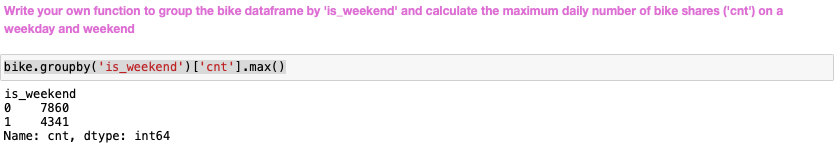
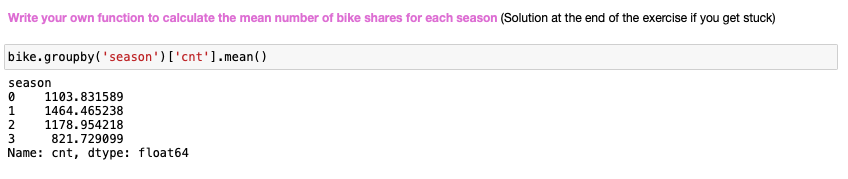
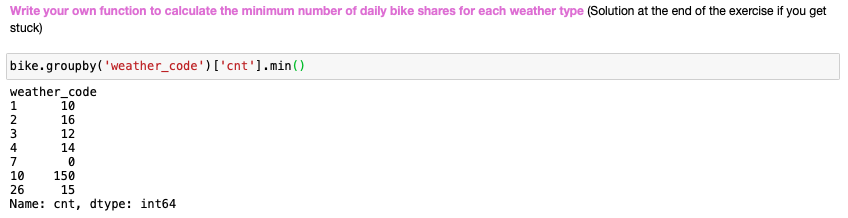